In [21]:
import pandas as pd

pd.set_option("display.max_columns",200)
pd.set_option("display.max_rows",200)

Cross-validation scores: [-0.02021266 -0.09194508 -0.02955463  0.01484028  0.02868938]
Avrage score: -0.019636539895039818


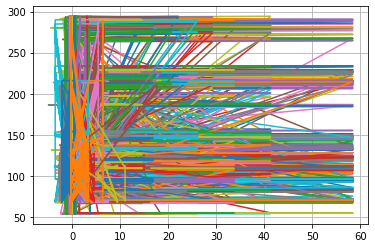

In [23]:
from sklearn import svm, linear_model, preprocessing
from sklearn.preprocessing import LabelBinarizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import MySQLdb
import itertools

lb = LabelBinarizer(sparse_output=True)

i = 0
X = []
Y = []

# データ読み込み
conn = MySQLdb.connect(host='localhost', port=3306, user='user1', passwd='Silver8810', db='hrdb', charset='utf8')
cur = conn.cursor()
cur.execute("SELECT Frame, HName, Sex, Age, Handicap, RName, Weight, Increase, Year, Month, Start, Weather, Ground, GCondition, Distance, Prize1, Prize2, Prize3, Prize4, Prize5 from jra_data")
for Var in cur:
    X.append(list(Var))
cur.execute("SELECT Time from jra_data")
for Var in cur:
    Y.append(list(Var))
Y = list(itertools.chain.from_iterable(Y))

# One-hot encording
# Xに入れる際にそれぞれの要素内で順番が逆になっている。 print(Sex_ohe[0]と実際にX内に入っている数値が逆)恐らくforの仕様？
# 全て一律に逆になっているのであれば問題はないので修正はしない。
Frame_ohe = [i[0] for i in X]
Frame_ohe = LabelBinarizer().fit_transform(Frame_ohe)
HName_ohe = [i[1] for i in X]
HName_ohe = LabelBinarizer().fit_transform(HName_ohe)
Sex_ohe = [i[2] for i in X]
Sex_ohe = LabelBinarizer().fit_transform(Sex_ohe)
RName_ohe = [i[5] for i in X]
RName_ohe = LabelBinarizer().fit_transform(RName_ohe)
Year_ohe = [i[8] for i in X]
Year_ohe = LabelBinarizer().fit_transform(Year_ohe)
Month_ohe = [i[9] for i in X]
Month_ohe = LabelBinarizer().fit_transform(Month_ohe)
Start_ohe = [i[10] for i in X]
Start_ohe = LabelBinarizer().fit_transform(Start_ohe)
Weather_ohe = [i[11] for i in X]
Weather_ohe = LabelBinarizer().fit_transform(Weather_ohe)
Ground_ohe = [i[12] for i in X]
Ground_ohe = LabelBinarizer().fit_transform(Ground_ohe)
GCondition_ohe = [i[13] for i in X]
GCondition_ohe = LabelBinarizer().fit_transform(GCondition_ohe)

for i in range(len(X)):
    del X[i][0:3]
    del X[i][2]
    del X[i][4:10]
    for j in Frame_ohe[i]:
        X[i].insert(0, j)
    for j in HName_ohe[i]:
        X[i].insert(18, j)
    for j in Sex_ohe[i]:
        X[i].insert(1322, j)
    for j in RName_ohe[i]:
        X[i].insert(1328, j)
    for j in Year_ohe[i]:
        X[i].insert(1494, j)
    for j in Month_ohe[i]:
        X[i].insert(1495, j)
    for j in Start_ohe[i]:
        X[i].insert(1507, j)
    for j in Weather_ohe[i]:
        X[i].insert(1513, j)
    for j in Ground_ohe[i]:
        X[i].insert(1518, j)
    for j in GCondition_ohe[i]:
        X[i].insert(1521, j)

# データ前処理/標準化
SC = preprocessing.StandardScaler()
X = SC.fit_transform(X)
Y = np.array(Y, dtype=np.float64)

# データ分割
# 本来は過去のデータをtrainデータにする必要あり
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

# 回帰分析
Reg = svm.SVR(C=1.0, kernel='rbf', epsilon=0.1, gamma='auto')
# Reg.fit(X_train, Y_train)

# 評価
score = cross_val_score(Reg, X, Y)
print("Cross-validation scores: {}".format(score))
print("Avarage score: {}".format(np.mean(score)))

# グラフ化
plt.plot(X, Y)
plt.grid(True)
plt.show()

cur.close()
conn.close()